In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [2]:
np.random.seed(5)
centers = [[1, 1], [-1, -1], [1, -1]]

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

"""
The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). 
Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters
"""

'\nThe data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). \nFour features were measured from each sample: the length and the width of the sepals and petals, in centimeters\n'

In [13]:
X.shape

(150, 4)

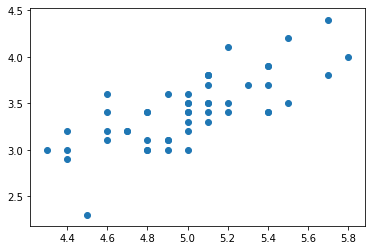

In [4]:
XX = []
for i,val in enumerate(y):
    if val==0:
        XX.append(X[i])
        
XX = np.array(XX)
plt.scatter(XX[:, 0], XX[:, 1])

In [5]:
np.mean(XX[:, 0])

5.006

In [6]:
XX[:, 1]

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3])

In [7]:
reg = LinearRegression().fit(XX[:, 0].reshape(-1, 1), XX[:, 1])
reg.score(XX[:, 0].reshape(-1, 1), XX[:, 1])

0.5513755803923133

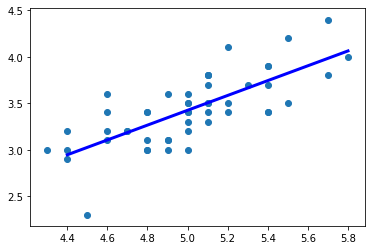

In [8]:
plt.scatter(XX[:, 0], XX[:, 1])

X_test=np.linspace(4.4,5.8,100)
y_pred = reg.predict(X_test.reshape(-1, 1))

plt.plot(X_test, y_pred, color='blue', linewidth=3)

Text(0, 0.5, 'Sepal width')

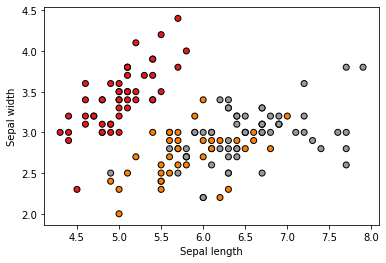

In [9]:
# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [10]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
Y = pca.transform(X)

Text(0, 0.5, 'Sepal width')

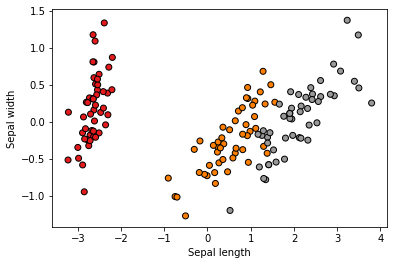

In [11]:
# Plot the training points
plt.scatter(Y[:, 0], Y[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

[]

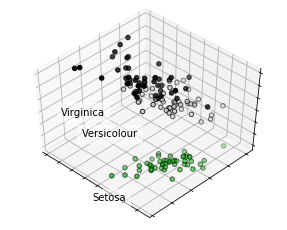

In [12]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])